# Lista 01

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from collections import Counter
# from scipy.stats import norm
# from itertools import combinations
from scipy.spatial.distance import cdist

import statsmodels.api as sm

### Using dataset from Peng's Book

https://dataverse.harvard.edu/file.xhtml?fileId=7440281&version=3.0

In [4]:
lalonde = pd.read_csv("cps1re74.csv", sep=r"\s+|;|:", engine="python")
lalonde["u74"] = (lalonde["re74"] == 0).astype(int)
lalonde["u75"] = (lalonde["re75"] == 0).astype(int)

new_column_names = [
    "treat",
    "age",
    "educ",
    "black",
    "hispan",
    "married",
    "nodegree",
    "re74",
    "re75",
    "u74",
    "u75",
    "re78",
]
lalonde = lalonde.reindex(columns=new_column_names)

lalonde.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,u74,u75,re78
count,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000
mean,0.011436,33.140508,12.008283,0.082339,0.071892,0.705755,0.300550,13887.722590,13504.038995,0.126352,0.114916,14758.358701
std,0.106329,11.036508,2.868005,0.274889,0.258317,0.455717,0.458511,9622.151843,9302.829970,0.332256,0.318931,9681.124686
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,11.000000,0.000000,0.000000,0.000000,0.000000,4080.000000,4100.000000,0.000000,0.000000,5490.000000
50%,0.000000,31.000000,12.000000,0.000000,0.000000,1.000000,0.000000,14900.000000,14400.000000,0.000000,0.000000,16200.000000
75%,0.000000,42.000000,13.000000,0.000000,0.000000,1.000000,1.000000,23500.000000,22800.000000,0.000000,0.000000,25600.000000
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25200.000000,1.000000,1.000000,60307.930000


In [5]:
y = lalonde["re78"]
z = lalonde["treat"]
x_names = new_column_names[1:-1]
x = lalonde[x_names]

print(f"Treatment samples: {z[z==1].count()}")
print(f"Control samples: {z[z==0].count()}")

Treatment samples: 185
Control samples: 15992


In [6]:
scaler = StandardScaler()
x_scaled = x.copy()
x_scaled[x_names] = scaler.fit_transform(x)

x_scaled.describe()

,age,educ,black,hispan,married,nodegree,re74,re75,u74,u75
count,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04,1.617700e+04
mean,-1.756921e-16,9.179912e-17,-2.459689e-17,3.250304e-17,1.159568e-16,-8.784605e-19,-1.967751e-16,7.379068e-17,-4.216610e-17,-3.338150e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.553122e+00,-4.187111e+00,-2.995450e-01,-2.783182e-01,-1.548719e+00,-6.555113e-01,-1.443352e+00,-1.451650e+00,-3.802973e-01,-3.603284e-01
25%,-8.282322e-01,-3.515735e-01,-2.995450e-01,-2.783182e-01,-1.548719e+00,-6.555113e-01,-1.019317e+00,-1.010911e+00,-3.802973e-01,-3.603284e-01
50%,-1.939540e-01,-2.888287e-03,-2.995450e-01,-2.783182e-01,6.456951e-01,-6.555113e-01,1.052061e-01,9.631356e-02,-3.802973e-01,-3.603284e-01
75%,8.027690e-01,3.457970e-01,-2.995450e-01,-2.783182e-01,6.456951e-01,1.525527e+00,9.990047e-01,9.992925e-01,-3.802973e-01,-3.603284e-01
max,1.980714e+00,2.089223e+00,3.338397e+00,3.593009e+00,6.456951e-01,1.525527e+00,2.198365e+00,1.257286e+00,2.629522e+00,2.775246e+00


In [57]:
def get_M_closest(x, m):
    distances = cdist(x[z==1], x[z==0], 'mahalanobis') #'euclidean'  mahalanobis
    dist_df = pd.DataFrame(np.transpose(distances), index=x[z==0].index, columns=x[z==1].index)
    smallest_indices = dist_df.apply(lambda col: col.nsmallest(m).index)
    return smallest_indices

In [87]:
m = 5
smallest_indices = get_M_closest(x, m)
smallest_indices

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,1616,7782,1843,5491,9657,2769,1981,5817,5511,865,...,9649,6730,10467,1428,3683,15170,5537,3536,1457,5337
1,14157,1409,11506,14605,11709,6879,5500,11709,8054,1943,...,12108,1837,2546,10107,14086,9808,1495,14653,769,7370
2,12648,5555,13548,11709,14605,11262,6230,14605,8783,5342,...,5657,4001,8227,1192,4020,9247,14838,4169,13440,2266
3,12501,10024,1320,11262,2769,11730,2779,5491,9617,6824,...,8539,1359,12432,11963,5287,7795,2259,3320,5623,15308
4,3264,11528,3787,2768,6879,14149,7717,11262,5312,8379,...,9554,8044,6638,5365,10058,2259,8760,11633,1689,14591


In [88]:
control = smallest_indices.values.flatten().tolist()
print(f'Potential control matching samples: {len(control)}')
print(f'Matching control samples: {len(set(control))}')
print(f"Treatment samples: {z[z==1].count()}")

all_samples = list(z[z==1].index)
all_samples.extend(control)
k = dict(Counter(all_samples))

all_samples = list(set(all_samples))
print(f'All samples: {len(all_samples)}')

Potential control matching samples: 925
Matching control samples: 396
Treatment samples: 185
All samples: 581


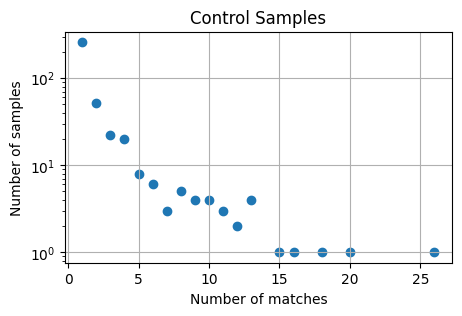

In [81]:
k_control = dict(Counter(control))
k_count = dict(Counter(list(k_control.values())))
plt.figure(figsize=(5,3))
plt.scatter(k_count.keys(), k_count.values())
plt.grid(True)
plt.xlabel("Number of matches")
plt.ylabel("Number of samples")
plt.yscale('log')
plt.title("Control Samples")
plt.show()


In [100]:
model = {}
model_fit = {}
mu = {}

model[0] = sm.OLS(y.loc[control], sm.add_constant((x.loc[control])))
model_fit[0] = model[0].fit()
mu[0] = model_fit[0].predict(sm.add_constant(x))

model[1] = sm.OLS(y[z==1], sm.add_constant((x[z==1])))
model_fit[1] = model[1].fit()
mu[1] = model_fit[1].predict(sm.add_constant(x))

In [101]:
model_fit[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   re78   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     28.88
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.06e-48
Time:                        11:17:00   Log-Likelihood:                -9218.8
No. Observations:                 925   AIC:                         1.846e+04
Df Residuals:                     914   BIC:                         1.851e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.0444   1938.606      0.644      0.520   -2556.592    5052.680
age         -123.4699     23.406     -5.275      0.000    -169.406     -77.534
educ         478.0554    133.483      3.581      0.000     216.087     740.024
black       -180.4590    588.133     -0.307      0.759   -1334.708     973.790
hispan       706.9449    914.064      0.773      0.439   -1086.962    2500.852
married      769.5890    525.178      1.465      0.143    -261.106    1800.284
nodegree     629.2364    548.134      1.148      0.251    -446.510    1704.983
re74           0.2332      0.066      3.549      0.000       0.104       0.362
re75           0.5476      0.087      6.328      0.000       0.378       0.717
u74            4.2397    664.991      0.006      0.995   -1300.847    1309.326
u75          -48.3565    561.297     -0.086      0.931   -1149.937    1053.224
==============================================================================
Omnibus:                      141.040   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.637
Skew:                           1.025   Prob(JB):                     5.50e-48
Kurtosis:                       4.202   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
model_fit[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   re78   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.002
Date:                Fri, 07 Jun 2024   Prob (F-statistic):             0.0357
Time:                        11:17:01   Log-Likelihood:                -1911.5
No. Observations:                 185   AIC:                             3845.
Df Residuals:                     174   BIC:                             3880.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3128.7565   5925.984     -0.528      0.598   -1.48e+04    8567.308
age           57.9829     85.977      0.674      0.501    -111.710     227.675
educ         548.2293    386.988      1.417      0.158    -215.565    1312.024
black       -590.4062   1947.146     -0.303      0.762   -4433.471    3252.659
hispan      1262.0935   3003.002      0.420      0.675   -4664.906    7189.093
married      935.6978   1553.947      0.602      0.548   -2131.314    4002.710
nodegree    -770.6822   1771.869     -0.435      0.664   -4267.804    2726.440
re74           0.2925      0.180      1.627      0.105      -0.062       0.647
re75           0.0119      0.260      0.046      0.964      -0.502       0.526
u74         6920.8818   2170.219      3.189      0.002    2637.540    1.12e+04
u75        -4052.4794   1849.011     -2.192      0.030   -7701.857    -403.102
==============================================================================
Omnibus:                      120.342   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.508
Skew:                           2.341   Prob(JB):                    2.57e-232
Kurtosis:                      13.790   Cond. No.                     6.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

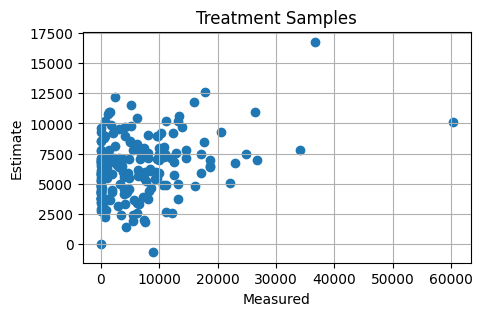

In [118]:
plt.figure(figsize=(5,3))
plt.scatter(y[z==1], mu[1][z==1])
plt.grid(True)
plt.xlabel("Measured")
plt.ylabel("Estimate")
# plt.xscale('log')
# plt.yscale('log')
plt.title("Treatment Samples")
plt.show()

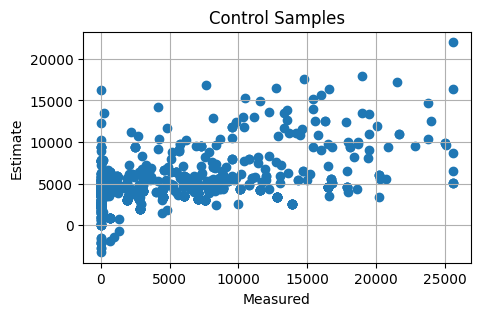

In [122]:
plt.figure(figsize=(5,3))
plt.scatter(y[control], mu[0][control])
plt.grid(True)
plt.xlabel("Measured")
plt.ylabel("Estimate")
# plt.xscale('log')
# plt.yscale('log')
plt.title("Control Samples")
plt.show()

In [142]:
# Biased estimator
y_0 = [y[smallest_indices[i]].mean() for i in z[z==1].index]
y_1 = [y[i] for i in z[z==1].index]
delta_Y = [y1 - y0 for (y1,y0) in zip (y_1, y_0)]
tau_m = sum(delta_Y) / len(delta_Y)
print(f'tau_m = {tau_m:0.2f}')

tau_m = 1421.38


In [153]:
# Unbiased estimator
b_i = [mu[0][i] - mu[0][smallest_indices[i]].mean() for i in z[z==1].index]
b = sum(b_i) / len(b_i)
tau_mbc = tau_m - b
print(f'tau_mbc = {tau_mbc:0.2f}')

tau_mbc = 1560.12


In [166]:
# Alternative formula
def phi_i(i, m):
    x = mu[1].loc[i] - mu[0].loc[i]
    x += (2*z.loc[i] - 1) * (1 + k[i]/m[z.loc[i]]) * (y.loc[i] - mu[z.loc[i]].loc[i])
    return x

In [167]:
phi = [phi_i(i, [m, 1]) for i in all_samples]

tau = sum(phi) / len(phi)
print(f'tau = {tau:0.2f}')

v_i_2 = [(p - tau)**2 for p in phi]
v = sum(v_i_2) / len(phi)**2
print(f'Sdt_dev = {np.sqrt(v):0.2f}')

tau = 852.47
Sdt_dev = 477.63
